In [52]:
import numpy as np
import matplotlib.pyplot as plt
from floweaver import *
from modules.algorithms import UtilityMatrix
from modules.agents import Population
from modules.simulator import Simulator
from modules.rewardsFunctions import RewardFunctionExponential, RewardFunctionSquaredExponential
from modules.samplers import UniformSamplerRecommendation, GaussianSamplerRecommendation, MixtureGaussianSamplerRecommendation
from modules.samplers import UniformSamplerOpinion, GaussianSamplerOpinion, MixtureGaussianSamplerOpinion
from modules.parameters import ParametersUser, ParametersPopulation
from modules.basic import Opinion
from sklearn.mixture import GaussianMixture
import time
from unidip import UniDip

In [53]:
reward = RewardFunctionSquaredExponential(decay_parameter=1.0)
# recommendation_sampler = UniformSamplerRecommendation(low=-1.0, high=1.0)
# recommendation_sampler = MixtureGaussianSamplerRecommendation(mean=[-1.0, 1.0], std=[0.1, 0.1])
# recommendation_sampler = GaussianSamplerRecommendation(mean=0.0, std=1.0)
opinion_sampler = UniformSamplerOpinion(low=-2.0, high=2.0)

In [54]:
n_f, n_a = 21, 21
f_vec = np.linspace(start=1, stop=21, num=n_f)
a_vec = np.linspace(start=0, stop=2, num=n_a)

f_mat, a_mat  = np.meshgrid(f_vec, a_vec, indexing='ij')

d = np.zeros((n_f, n_a))
final_distribution = []

for i in range(n_f):
    print(i)
    final_distribution_i = []
    for j in range(n_a):
        parameters = ParametersUser(prejudice=0.0,
                                    weight_prejudice=0.0,
                                    weight_recommendation=1.0-0.8,
                                    weight_current_opinion=0.8,
                                    reward=reward)
        parameters_population = ParametersPopulation(parameters=parameters,
                                                     repeat=5000)
        # Define population
        population = Population(parameters=parameters_population,
                                initial_state=opinion_sampler,
                                save_history=False)

        alg = UtilityMatrix(n_agents=population.n_agents(),
                            recommendation_sampler=MixtureGaussianSamplerRecommendation(mean=[-0.5*a_mat[i, j], 0.5*a_mat[i,j]], std=[0.1, 0.1]),
                            exploration_probability=None,
                            exploration_frequency=f_mat[i, j],
                            save_history=False)
        # Simulator
        simulator = Simulator(agent=population,
                              algorithm=alg)
        # Run
        simulator.run(horizon=int(20*f_mat[i, j]),  # TODO: do exploration cycles
                      initialize=True)

        # Fit mixture
        final_distribution = simulator.metrics()['final_distribution'].reshape((-1, 1))
        gm = GaussianMixture(n_components=2, random_state=0).fit(final_distribution)
        d[i, j] = abs(gm.means_[0]-gm.means_[1])

        #print(d[i,j])
        # print(intervals)
        #plt.close()
        #plt.hist(final_distribution)
        #plt.show()
        #time.sleep(.5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


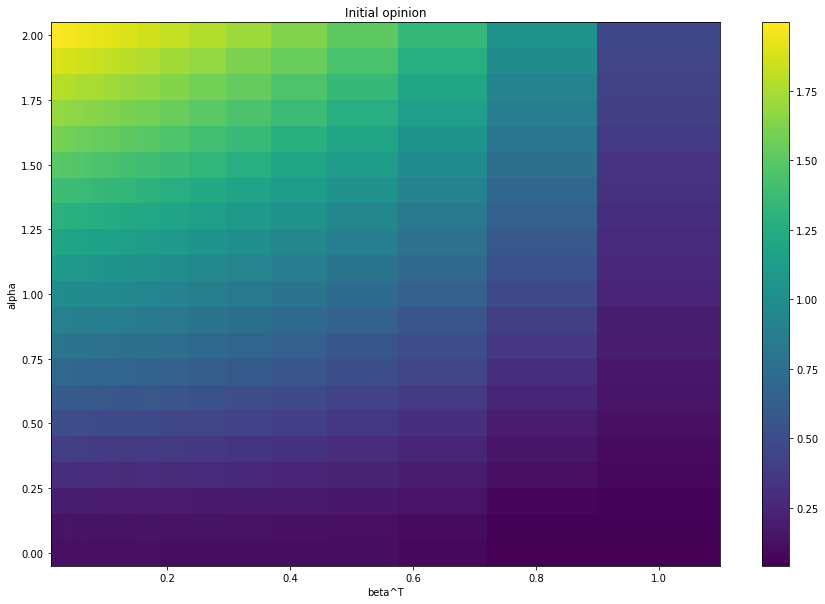

In [55]:
plt.rcParams['figure.figsize'] = [15, 10]
save = True

# Make plot  # TODO: distance caused by random recommender system
fig, axes = plt.subplots(1, 1)

ax = axes
c = ax.pcolormesh(np.power(0.8, f_mat-1.0), a_mat, d)
fig.colorbar(c, ax=ax)
ax.set_title('Initial opinion')
ax.set_ylabel('alpha')
ax.set_xlabel('beta^T')
if save:
    np.savetxt("dpol.csv", np.vstack((np.power(0.8, f_mat.reshape(-1)-1.0), a_mat.reshape(-1), d.reshape(-1))).T, delimiter=",")

plt.show()

In [56]:
max(np.power(0.8, f_mat.reshape(-1)-1.0))

1.0

In [57]:
a_vec

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])